In [2]:
import numpy as np
import pandas as pd
import pandas_datareader as web
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, LSTM
plt.style.use('fivethirtyeight')

import warnings

warnings.filterwarnings('ignore')

In [15]:
df = pd.read_csv("required_csv.csv")

#show the dataset
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659096
1,2004-08-20,50.555557,54.594597,50.300301,54.209209,54.209209,22834343
2,2004-08-23,55.430431,56.796799,54.579578,54.754753,54.754753,18256126
3,2004-08-24,55.675674,55.855858,51.836838,52.487488,52.487488,15247337
4,2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188602
...,...,...,...,...,...,...,...
4426,2022-03-18,2668.489990,2724.879883,2645.169922,2722.510010,2722.510010,2223100
4427,2022-03-21,2723.270020,2741.000000,2681.850098,2722.030029,2722.030029,1341600
4428,2022-03-22,2722.030029,2821.000000,2722.030029,2797.360107,2797.360107,1774800
4429,2022-03-23,2774.050049,2791.770020,2756.699951,2765.510010,2765.510010,1257700


In [3]:
pip install pandas_datareader


Note: you may need to restart the kernel to use updated packages.


In [16]:
df.shape

(4431, 7)

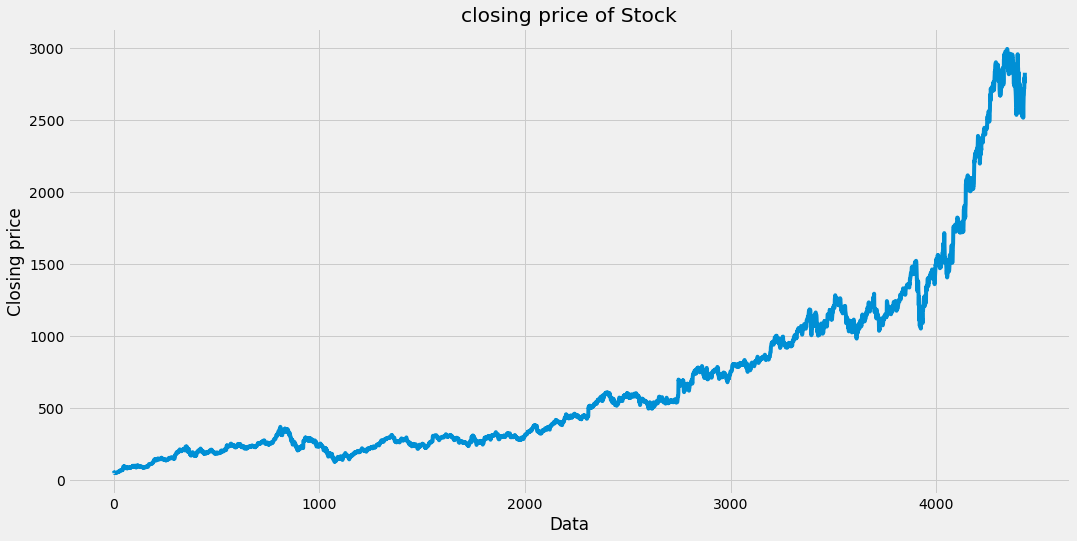

In [17]:
#visualize the closing prices
plt.figure(figsize=(16,8))
plt.title('closing price of Stock')
plt.plot(df["Close"])
plt.xlabel('Data')
plt.ylabel('Closing price')
plt.show()

In [18]:
#create new database with only required coloumns
data=df.filter(['Close'])
#convert the dataframe to numpy array
dataset=data.values
#get the number of rows to train 80 percent
training_data_len=math.ceil(len(dataset)*0.8)
training_data_len

3545

In [19]:
#scale the data
scaler=StandardScaler() 
scaled_data=scaler.fit_transform(dataset)
print("MEAN of processed data: ",scaled_data.mean())
print("Standard deviation of processed data: ",scaled_data.std())

MEAN of processed data:  1.0262860548103456e-16
Standard deviation of processed data:  1.0


In [20]:
#create the training data
#create scaled training dataset
train_data = scaled_data[0:training_data_len, :]
#split the data to x_train and y_train
x_train=[]
y_train=[]
for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i])
  y_train.append(train_data[i])
x_train=np.array(x_train)
y_train=np.array(y_train)

In [21]:
import numpy as np
#reshape the data
print("x_train shape before reshaping",x_train.shape)
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1)) #np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
print("x_train shape after reshaping",x_train.shape)

x_train shape before reshaping (3485, 60, 1)
x_train shape after reshaping (3485, 60, 1)


In [22]:
#build LSTM model
model= Sequential()
model.add(LSTM(200,return_sequences=True,input_shape=(x_train.shape[1], 1)))
model.add(LSTM(200,return_sequences=False))
model.add(Dense(100))
model.add(Dense(50))
model.add(Dense(1))

In [23]:
#compile the model
model.compile(optimizer='adam',loss='mean_squared_error')

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 200)           161600    
                                                                 
 lstm_1 (LSTM)               (None, 200)               320800    
                                                                 
 dense (Dense)               (None, 100)               20100     
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 507,601
Trainable params: 507,601
Non-trainable params: 0
_________________________________________________________________


In [24]:
#train the model
history = model.fit(x_train,y_train,epochs=20)

Epoch 1/20
109/109 [==============================] - 20s 136ms/step - loss: 0.0067
Epoch 2/20
109/109 [==============================] - 15s 139ms/step - loss: 6.2230e-04
Epoch 3/20
109/109 [==============================] - 15s 140ms/step - loss: 5.8314e-04
Epoch 4/20
109/109 [==============================] - 16s 145ms/step - loss: 5.4831e-04
Epoch 5/20
109/109 [==============================] - 17s 152ms/step - loss: 5.1253e-04
Epoch 6/20
109/109 [==============================] - 17s 158ms/step - loss: 4.8142e-04
Epoch 7/20
109/109 [==============================] - 17s 158ms/step - loss: 4.8253e-04
Epoch 8/20
109/109 [==============================] - 17s 160ms/step - loss: 4.6280e-04
Epoch 9/20
109/109 [==============================] - 17s 160ms/step - loss: 4.5938e-04
Epoch 10/20
109/109 [==============================] - 17s 159ms/step - loss: 4.3468e-04
Epoch 11/20
109/109 [==============================] - 18s 163ms/step - loss: 3.3319e-04
Epoch 12/20
109/109 [=============

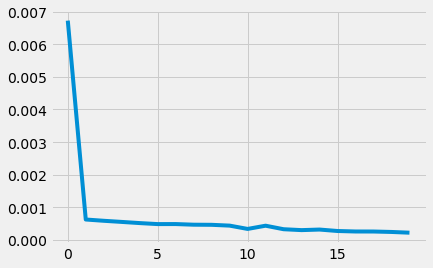

In [25]:
plt.plot(history.history['loss'])

In [26]:
#create the testing dataset
#createt new array
test_data=scaled_data[training_data_len-60:, :]
#create the dataset x_test and y_test
x_test=[]
y_test=dataset[training_data_len: , :]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [27]:
#convert the data to numpy 
x_test=np.array(x_test)

In [28]:
#reshape the data
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [23]:
#get the model predicted value
predictions =model.predict(x_test)
predictions=scaler.inverse_transform(predictions)
print(predictions)

57/57 [==============================] - 12s 44ms/step
[[ 46.141026]
 [ 47.45344 ]
 [ 47.11095 ]
 ...
 [266.61508 ]
 [269.24695 ]
 [268.30313 ]]


In [29]:
#plot the data
train=data[:training_data_len]
valid=data[training_data_len:]
valid['Predictions']=predictions

NameError: name 'predictions' is not defined

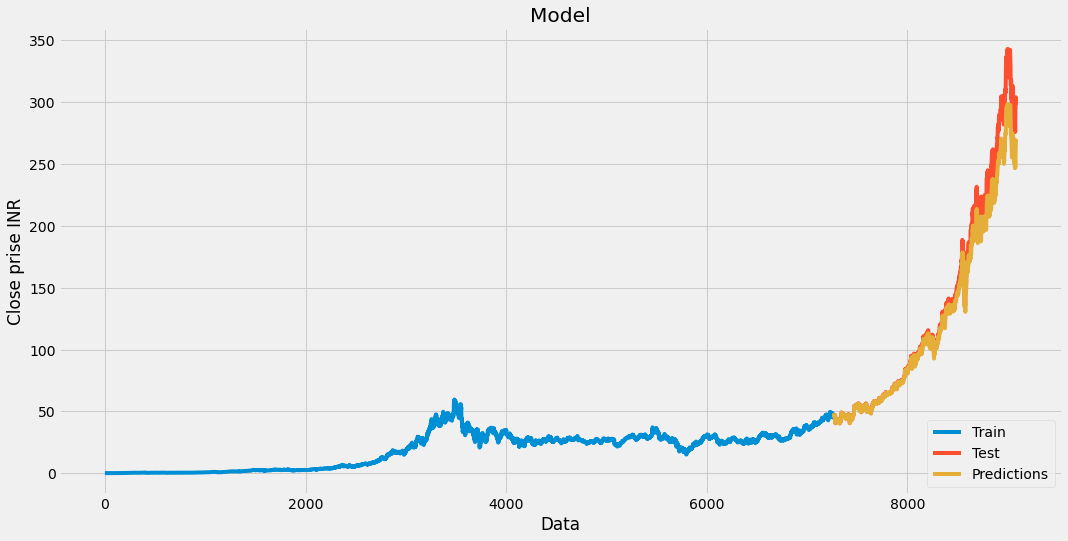

In [25]:
#visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Data')
plt.ylabel('Close prise INR')
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Test','Predictions'],loc='lower right')
plt.show()

In [30]:
#show the valid and predicted value
valid

,Close
3545,1167.109985
3546,1174.270020
3547,1191.569946
3548,1172.119995
3549,1179.560059
...,...
4426,2722.510010
4427,2722.030029
4428,2797.360107
4429,2765.510010
